# Percolation Theory

Create a grid of squares and mark some of them as black (non-porous) and white (porous).  Water flows from the top, and the question is whether it can reach the bottom.  It can go left/right/down (this rule could be changed) and it can only travel on porous squares.

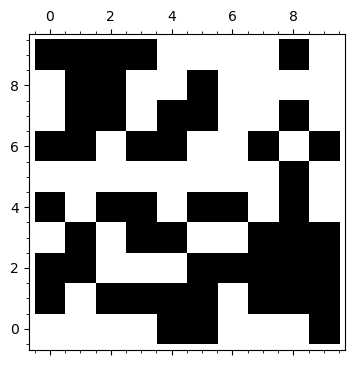

In [1]:
n = 10 # width/height of grid
m = matrix([[randint(0,1) for _ in range(n)] for _ in range(n)])
plot(m, axes=False, frame=True, figsize = 5)

Create a function that will produce such a matrix of given dimension and with probability p of porousness, using randomness seed s.

A hint:  A nice way to to get a 0 with probability p and a 1 with probability 1-p is the following:
```
ZZ(random.random() >= p)
```
The idea here is that `random.random() >= p` returns a boolean, which we cast to an integer.

In [2]:
import random
def percolation_grid(n, p ,s):
    rng = random.seed(int(s))
    m = matrix([[ZZ(random.random() >= p)  for _ in range(n)] for _ in range(n)])
    return m

In [3]:
percolation_grid(10,0.1,42)

[1 0 1 1 1 1 1 0 1 0]
[1 1 0 1 1 1 1 1 1 0]
[1 1 1 1 1 1 0 0 1 1]
[1 1 1 1 1 1 1 1 1 1]
[1 0 1 1 0 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 0 1 1]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 0 0]
[1 1 1 1 0 1 1 1 1 1]

Now a coding challenge.  The idea is to create an algorithm to check whether water can reach the bottom of the grid or not.  First, come up with your own algorithm idea.  No need to code it right now, but write down the idea.

In [4]:
# record a basic idea
    

## Recursive approach

Now, I'd like to guide you to make a *recursive algorithm*.  We'll do this step by step.

Create a function `neighbours` which returns the coordinates of the neighbours of a point that water could potentially flow to (left, right, down), based on matrix dimension and coordinates.


In [5]:
def neighbours(n, i, j): # returns list of pairs
    nbs = []
    if i != n-1:
        nbs.append((i+1,j)) # down
    if j != 0:
        nbs.append((i,j-1)) # left
    if j != n-1:
        nbs.append((i,j+1)) # right
    return nbs

# test -- always good to test units of your code!
n = 5
m = matrix(n,n)
i, j = 2,4
m[i,j] = -1
for pair in neighbours(n,i,j):
    m[*pair] = 1
m

[ 0  0  0  0  0]
[ 0  0  0  0  0]
[ 0  0  0  1 -1]
[ 0  0  0  0  1]
[ 0  0  0  0  0]

Create a function `local_percolatable` which takes in a matrix and coordinates, and does the following to determine if you can percolate from there out the bottom of the grid:

1. If the coordinates indicate a bottom row square, returns True when it's porous and False otherwise.
2. If it's not a bottom row square, list all neighbours (using `neighbours`), and call `local_percolatable` on each of those in turn.  If any one returns True, immediately return True.  If all return False, return False.
3. I've purposely forgotten something that will bite you.  Just follow my instructions for now.

Fun tip:  `any()` will return True if any of the inputs are True, False otherwise


In [49]:
def local_percolatable_firsttry(m, i, j): 
    #print(i,j)
    if i == m.nrows()-1:
        return m[i, j] == 0 # boolean check (notice the `==`)
    else:
        if m[i,j] == 1: return False 
        return any(local_percolatable_firsttry(m, ni, nj)
               for ni, nj in neighbours(m.nrows(), i, j))

Test it out until something breaks.

In [54]:
m = percolation_grid(10,0.5,4)
show(m)
local_percolatable_firsttry(m,0,0)

[0 0 0 0 0 0 1 1 1 0]
[1 0 0 0 0 1 1 1 1 0]
[0 1 1 1 1 0 1 1 1 0]
[0 0 1 1 1 0 1 1 1 1]
[1 0 1 0 0 0 1 0 0 1]
[0 1 0 0 1 0 0 0 1 0]
[0 1 0 1 1 0 0 0 1 1]
[0 0 0 0 0 1 1 1 1 1]
[0 0 1 1 0 1 1 1 0 0]
[0 0 0 1 0 0 0 0 1 0]

RecursionError: maximum recursion depth exceeded

If you see `maximum recursion depth exceeded` this means you're probably in an infinite loop.  How can that happen?  How can you stop it?  This is item 3 above.

For this, it is helpful to know there's something called a `set` in python.  It's like a list, but ordering doesn't matter and repeats aren't allowed (it's a set, get it?).  You build it with `{}`.  Python set elements must be hashable (more on that someday).  Sage also has `Set`s which are immutable but have some extra functionality that can deal with infinite sets, powersets, cartesian products and other mathy stuff, but are also slower.  Here's a basic cheat sheet for python sets:

#### Create

* `set()` → empty set
* `{1,2,3}` → Python set

#### Inspect

* `len(S)` → size
* `x in S` → membership
* `list(S)`, `sorted(S)` → convert/order

#### Mutate

* `S.add(x)`, `S.update(iterable)`
* `S.remove(x)` (KeyError if absent), `S.discard(x)` (no error)
* `S.pop()` (remove/return arbitrary), `S.clear()`
* `S.copy()`

#### Set ops

* `S | T` or `S.union(T)`
* `S & T` or `S.intersection(T)`
* `S - T` or `S.difference(T)`
* `S ^ T` or `S.symmetric_difference(T)`

#### Relations / tests

* `S <= T`; `S < T`; `S >= T`; `S > T`; `S == T`
* `S.isdisjoint(T)`
* `S.issubset(T)`

#### Comprehensions

* `{f(x) for x in it if cond(x)}`

Write a new version of `local_percolatable` that doesn't have the problem the original did.  Pass in a set of vertices called `seen`.  Let's also make this debuggable by having it modify each location in the matrix that it checks from 0 to 2.  Comparing the matrix before and after will show what it looked at.  (We can remove this later.)

In [102]:
def local_percolatable(m, i, j, seen = None): # last argument can be left out
    if seen == None:  seen = set()
    #print(i,j)
    if i == m.nrows()-1:
        return m[i, j] == 0 # boolean check (notice the `==`)
    else:
        if m[i,j] != 0 or (i,j) in seen: return False 
        seen.add((i,j))
        m[i,j] = 2
        return any(local_percolatable(m, ni, nj, seen) for ni, nj in neighbours(m.nrows(), i, j))

Now, create a master function `recurse_percolatable` that uses `local_percolatable` to determine if a matrix has a percolation path. 

Would you call this a depth-first search or a breadth-first search?

In [72]:
def recurse_percolatable(m):
    toprow = [ [0,j] for j in range(m.nrows()) ]
    for spot in toprow:
        if m[*spot] == 0:
            if local_percolatable(m, *spot): return True
    return False

Test it out a bit.

In [73]:
m = percolation_grid(10,0.3,42)
show(m)
print(recurse_percolatable(m))
show(m)

[1 0 0 0 1 1 1 0 1 0]
[0 1 0 0 1 1 0 1 1 0]
[1 1 1 0 1 1 0 0 1 1]
[1 1 1 1 1 1 1 1 1 1]
[1 0 0 0 0 0 0 0 1 1]
[1 0 0 1 1 1 0 1 0 1]
[1 1 1 1 1 1 0 0 1 0]
[0 1 1 1 1 1 1 1 0 0]
[1 0 1 1 1 0 1 1 0 0]
[0 1 1 1 0 1 1 1 1 1]

False


[1 2 2 2 1 1 1 2 1 2]
[0 1 2 2 1 1 0 1 1 2]
[1 1 1 2 1 1 0 0 1 1]
[1 1 1 1 1 1 1 1 1 1]
[1 0 0 0 0 0 0 0 1 1]
[1 0 0 1 1 1 0 1 0 1]
[1 1 1 1 1 1 0 0 1 0]
[0 1 1 1 1 1 1 1 0 0]
[1 0 1 1 1 0 1 1 0 0]
[0 1 1 1 0 1 1 1 1 1]

## Breadth-first search

A non-recursive search is like a little minion who wanders around according to a todo list, and yells out if he finds the bottom of your percolation grid.  You load him up with a list of starting cells (the top row), then he will repeatedly:

1. take a cell off his list
2. if it's a bottom-row cell, yell "YAY!  PERCOLATABLE!"
3. if not, list out the not-yet-before-seen and porous neighbours and add them to the list
4. go back to (1.)
5. if he runs out of things to check on his list, yell "BOO!  NON-PERCOLATABLE!"

The "breadth-first" aspect is that his list of cells is is a first-on-first-off queue:  the next cell he looks at is the one that's been on the list the longest.  Also, when he lists out the neighbours, he should ignore those he has examined previously, as well as those that are not porous.  He adds these new porous ones to his queue to examine later.

Here's pseudo-code of a breadth-first search for percolatability:

```
startcells = cells in top row
q = queue of such things (use from collections import deque)
seen = set of cells we've seen

while q is not empty:
    pop off the next frontier cell
    if it's in bottom row, we're done, return true
    for each neighbour:
        if seen or non-porous, skip
        add to seen
        add to queue
```

You might want to use `from collections import deque` which is a very efficient queue functionality.  It has basic commands:

`append`, `appendleft` (put things on right or left)
`pop`, `popleft` (take things off right or left)

Implement the algorithm above!  

Actually, it's pretty hard to know whether this worked right.  One way to track what's been examined is to simply update visited porous cells from 0 to 2 in m.  Then you can show m before and after, to see if it's really exhaustively searching.

In [79]:
from collections import deque # fast queue functionality

def BFS_percolatable(m):

    nrows = m.nrows()
    ncols = m.ncols()
    startcells = [(0,k) for k in range(ncols) if m[0,k] == 0]
    q = deque(startcells)            # first-in-first-out queue of discovered cells not yet examined
    seen = set(startcells)           # set of discovered cells (prevents re-enqueueing)

    while q: # while there's something there
        i,j = q.popleft()       # read the next frontier cell (i,j coords)
        if i == nrows - 1: return True      # if we reached the bottom row

        # put all neighbors in the queue
        for ni, nj in neighbours(nrows, i, j):
            if (ni, nj) in seen or m[ni, nj] != 0: continue # skip seen or non-porous
            seen.add((ni, nj))   # we've seen it
            m[ni,nj] = 2
            q.append((ni, nj))   # add future frontier to the queue

    return False # never reached the bottom

In [80]:
m = percolation_grid(10,0.8,0)
show(m)
print(BFS_percolatable(m))
show(m)

[1 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 1 1 1 1]
[0 0 1 0 0 0 0 0 1 1]
[0 1 0 1 0 0 0 0 1 0]
[0 0 1 0 0 1 0 0 0 1]
[1 0 0 0 0 1 0 0 0 0]
[1 0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 1 1]
[1 1 0 0 0 0 1 1 1 0]
[1 0 0 0 1 1 0 0 0 0]

True


[1 0 0 0 0 0 0 0 0 0]
[1 2 2 2 2 2 1 1 1 1]
[2 2 1 2 2 2 2 2 1 1]
[2 1 0 1 2 2 2 2 1 0]
[2 2 1 2 2 1 2 2 2 1]
[1 2 2 2 2 1 2 2 2 2]
[1 2 1 2 2 2 2 2 2 2]
[2 2 2 2 2 2 2 1 1 1]
[1 1 2 2 2 2 1 1 1 0]
[1 0 0 2 1 1 0 0 0 0]

We have now programmed percolation in two algorithms.  Let's test our work to see if the algorithms actually agree!  Write a little loop to test 100 10x10 grids with varying probabilities.

maybe useful:  `random.uniform(0,1)` produces a random python float in the unit interval.

Warning!  This is harder than it sounds.  It's important to use the same probability and seed when testing both; keep in mind the algorithms modify m.

In [85]:
# test if algorithms agree
for seed in range(1000):
    prob = random.uniform(0,1)
    m = percolation_grid(10,prob,seed)
    BFS_result = BFS_percolatable(m)
    m = percolation_grid(10,prob,seed)
    recurse_result = recurse_percolatable(m)
    if BFS_result != recurse_result:
        m = percolation_grid(10,prob,seed)
        print(prob, seed)
        print( m, BFS_result, recurse_result)

In [86]:
prob = 0.4151736932178327
seed = 11
m = percolation_grid(10,prob,seed)
BFS_result = BFS_percolatable(m)
show(m)
m = percolation_grid(10,prob,seed)
recurse_result = recurse_percolatable(m)
show(m)

[1 1 1 1 1 1 0 1 1 1]
[0 0 0 1 1 0 1 1 1 1]
[0 0 1 0 0 0 0 1 1 1]
[1 1 1 1 1 0 1 1 1 1]
[0 0 0 0 1 0 1 0 1 1]
[0 0 1 1 1 0 0 1 1 0]
[0 0 1 1 0 0 0 0 1 0]
[1 1 0 1 0 1 0 1 0 0]
[1 1 0 1 0 0 1 1 0 1]
[0 0 1 0 0 0 0 1 0 1]

[1 1 1 1 1 1 2 1 1 1]
[0 0 0 1 1 0 1 1 1 1]
[0 0 1 0 0 0 0 1 1 1]
[1 1 1 1 1 0 1 1 1 1]
[0 0 0 0 1 0 1 0 1 1]
[0 0 1 1 1 0 0 1 1 0]
[0 0 1 1 0 0 0 0 1 0]
[1 1 0 1 0 1 0 1 0 0]
[1 1 0 1 0 0 1 1 0 1]
[0 0 1 0 0 0 0 1 0 1]

## Critical value for percolation

Ok, there's a `critical value' for percolation:  the probability p at which we go from mostly unpercolatable to mostly percolatable.  Devise a way to search for and approximate this value.

A useful tool to know about is `list_plot`.

Try both algorithms above and see if one is faster than the other (since now you're running lots of tests).

In [92]:
def perc_plot(start,end,detail,numtests):
    data = []
    for k in range(start,end):
        ct = 0
        ct2 = 0
        for l in range(numtests):
            m = percolation_grid(10,k/detail,l)
            if BFS_percolatable(m):
                ct += 1
        data.append([k/detail,ct])
    list_plot(data, color="red").show()

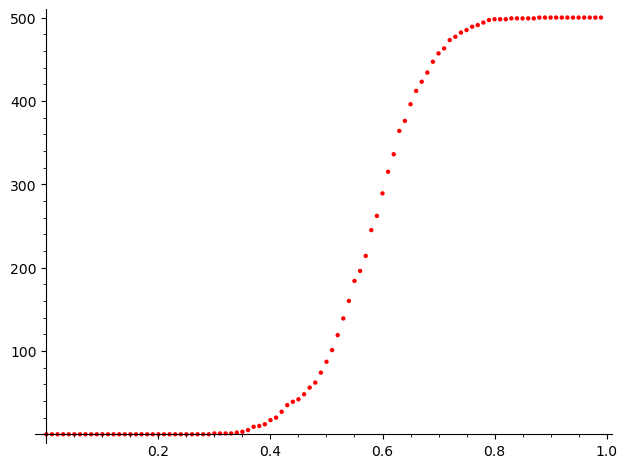

In [93]:
perc_plot(0,100,100,500)

Now this was supposed to be a number theory class!  Let's test some number theory things for percolatability.  We can build a matrix of 1s and 0s based on pretty much anything and ask about percolatability.

In [124]:
import numpy as np
ct = 0 # percolations
tot = 0 # non-zero entries
for k in range(3,100):
    m = matrix([[min(1,1 - legendre_symbol(nth_prime(i), nth_prime(j))) for i in range(k, 10+k)] for j in range(k, 10+k)]) 
    for i in range(10): # make diagonal zeroes (otherwise never percolatable)
        m[i,i] = 0
    if BFS_percolatable(m):
        ct += 1
    thistot = np.count_nonzero(m.numpy()) # count nonzero entries
    #print(thistot/100.n())
    tot += thistot
print(ct/96.n(), tot/(100*96).n() )

0.250000000000000 0.657604166666667


In [142]:
import numpy as np
ct = 0 # percolations
tot = 0 # non-zero entries
for k in range(3,100):
    m = matrix([[ ZZ(random.uniform(0,1) > 0.52) for i in range(k, 10+k)] for j in range(k, 10+k)]) 
    for i in range(10): # make diagonal zeroes 
        m[i,i] = 0
    if BFS_percolatable(m):
        ct += 1
    thistot = np.count_nonzero(m.numpy()) # count nonzero entries
    #print(thistot/100.n())
    tot += thistot
print(ct/96.n(), tot/(100*96).n() )

0.510416666666667 0.680416666666667
